# Прогнозирование   урожайности на базе машинного обучения 

In [40]:
import pandas as pd
import numpy as np
data = pd.read_csv("data_harvest_potato_nor_rasp.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,harvest
0,87.819182,58.919279,59.933521,17.076650,59.373490,7.011549,178.291618,34.150679
1,87.332223,57.323047,67.770787,17.489714,59.220536,8.065805,188.663624,34.239028
2,89.999038,59.417227,59.809383,15.764726,57.918171,7.762093,179.108094,34.809581
3,90.985802,60.585585,64.916464,16.463727,57.691626,7.590725,178.623260,35.353490
4,86.895906,57.106282,63.712803,15.672241,56.103904,7.372190,186.617709,33.920886


In [41]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
harvest        0
dtype: int64

In [42]:
data = data.dropna()

In [43]:
#Все параметры
x = data.drop("harvest",axis=1)
y = data[["harvest"]]

cols = ['N','P','K','temperature','humidity','ph','rainfall']

#Выбранные параметры
x1 = data.drop(cols,axis=1)

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x = std.fit_transform(x)
y = std.fit_transform(y)
x1 = std.fit_transform(x1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.02, random_state=71)
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.02, random_state=71)


## СЛУЧАЙНЫЙ ЛЕС С ИСПОЛЬЗОВАНИЕМ ВСЕХ ПАРАМЕТРОВ

In [44]:
#Использование всех параметров
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
pred_all = model.predict(x_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
 
print("R2score:", r2_score(y_test,pred_all))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_all)))
print('MAE:', mean_absolute_error(y_test, pred_all))

C:\Anaconda\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R2score: 0.9989549780522363
RMSE: 0.031812718423708385
MAE: 0.02398087396607701


### Оценка моделей.Использование выбранных параметров

In [45]:
#Использовать выбранные параметры
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x1_train,y_train)
pred_selected = model.predict(x1_test)
from sklearn.metrics import r2_score
r = r2_score(y_test,pred_selected)
print("R2score: ",r)
print('RMSE:',np.sqrt(mean_squared_error(y_test, pred_selected)))
print('MAE:',mean_absolute_error(y_test, pred_selected))

C:\Anaconda\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R2score:  0.9999997864135447
RMSE: 0.00045480468497156976
MAE: 0.00026356211305576956


In [48]:
pred_selected


array([ 1.18459317,  0.24324683, -0.98675882,  0.88907751,  0.85186806,
        0.05951599,  0.30366108,  0.75626868, -0.37650069,  0.72379158,
        1.15192073,  1.2115965 ,  0.96029966,  0.73095333,  1.29683022,
       -1.29213229, -1.91356203, -0.58263132,  0.22298075,  0.34935577,
        0.37691304,  0.61932142,  0.30782909, -0.11121624,  1.4455595 ,
        1.25787539,  1.40745409, -0.61469956,  0.82010233, -1.75185353,
       -0.35141034, -1.95315539,  1.20880183,  1.09281304,  0.74013166,
       -2.01291889, -0.19750708, -0.25099072, -0.17350382, -0.6232289 ,
       -0.24576725, -0.94635461, -2.15734836, -1.08586452, -1.02054493,
        1.16937552, -0.18433936, -0.99343844,  0.47339549,  0.09005697,
       -1.77110662, -0.31632049,  1.55934498,  0.19539357,  0.2465507 ,
        1.61061805,  0.00565825,  0.72184011,  0.64403952,  0.53759147,
        1.22982313, -0.81694164, -1.86146218, -1.90696523, -0.0732395 ,
       -0.71213953,  0.97945644,  1.22871273,  0.82183614,  0.66

### СРАВНИТЕЛЬНАЯ ДИАГРАММА ПРОИЗВОДИТЕЛЬНОСТИ МОДЕЛЕЙ 

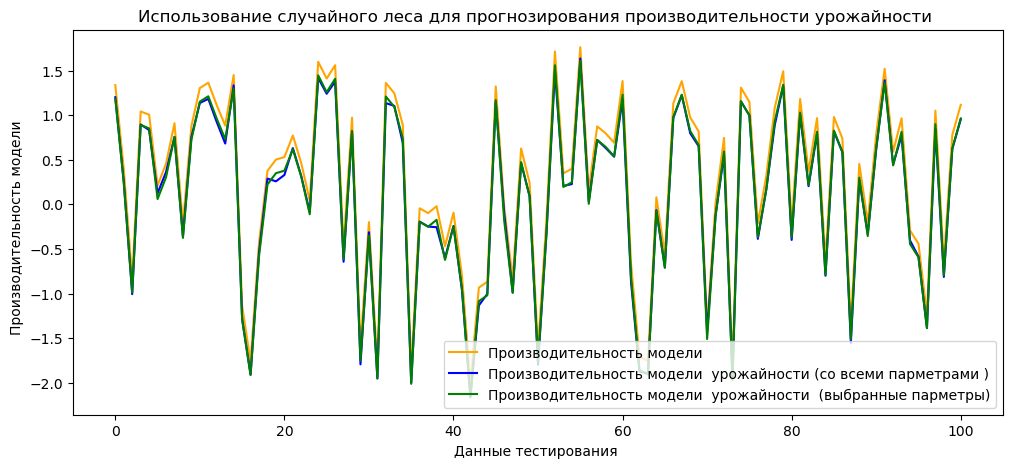

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,5))
y_test=y_test+0.1525
plt.plot(y_test, color='orange',label='Производительность модели ')
plt.plot(pred_all, color='blue',label='Производительность модели  урожайности (со всеми парметрами )')
plt.plot(pred_selected, color='green',label='Производительность модели  урожайности  (выбранные парметры)')
plt.title('Использование случайного леса для прогнозирования производительности урожайности ')
plt.xlabel("Данные тестирования ")
plt.ylabel('Производительность модели  ')
plt.legend()
plt.show()

## Метод опорных векторов

### Использование всех параметров

In [50]:
#Используем все параметры
from sklearn.svm import SVR
from sklearn import metrics
svr=SVR() #Гиперпараметры по умолчанию
svr.fit(x_train,y_train)
pred_all=svr.predict(x_test)
#print('r2 Score:')
print('R2 score:',r2_score(y_test, pred_all))
print('RMSE:',np.sqrt(mean_squared_error(y_test, pred_all)))
print('MAE:',mean_absolute_error(y_test, pred_all))

R2 score: 0.9769677262446926
RMSE: 0.14935043180572602
MAE: 0.14031833503404212


C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### ИСПОЛЬЗОВАНИЕ ВЫБРАННЫХ ПАРАМЕТРОВ

In [51]:
#Использование выбранных параметров
from sklearn.svm import SVR
from sklearn import metrics
svr=SVR() #Гиперпараметры по умолчанию
svr.fit(x1_train,y_train)
pred_sel = svr.predict(x1_test)
#print('r2 Score:')
print('R2 score:',r2_score(y_test,pred_sel))
print('RMSE:',np.sqrt(mean_squared_error(y_test, pred_sel)))
print('MAE:',mean_absolute_error(y_test, pred_sel))

R2 score: 0.9617923551140747
RMSE: 0.19235930975107604
MAE: 0.1814844990410894


C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### СРАВНИТЕЛЬНЫЙ АНАЛИЗ ПРОИЗВОДИТЕЛЬНОСТИ

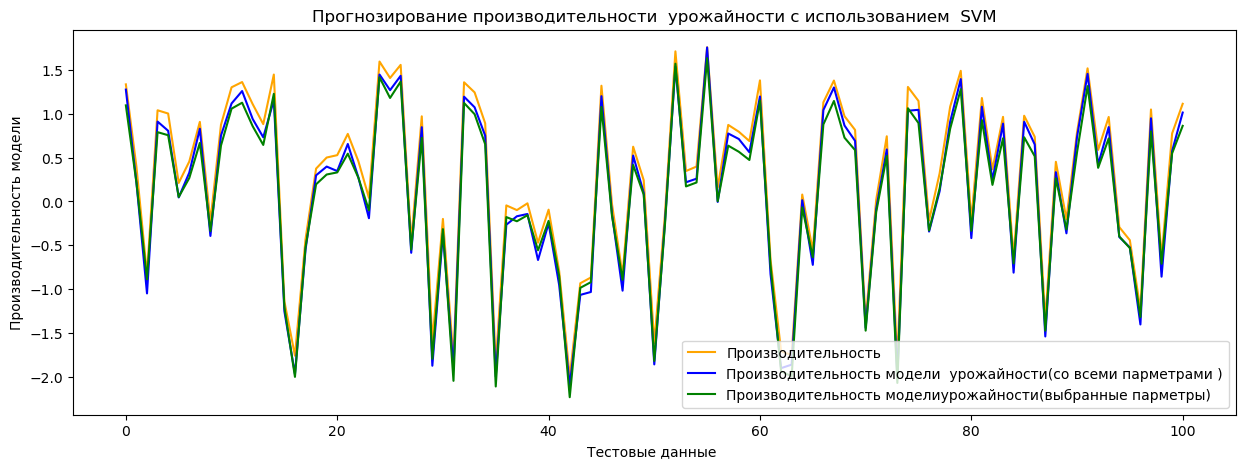

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.plot(y_test, color='orange',label='Производительность')
plt.plot(pred_all, color='blue',label='Производительность модели  урожайности(со всеми парметрами )')
plt.plot(pred_sel, color='green',label='Производительность моделиурожайности(выбранные парметры)')
plt.title('Прогнозирование производительности  урожайности с использованием  SVM')
plt.xlabel("Тестовые данные ")
plt.ylabel('Производительность модели')
plt.legend()
plt.show()

## ЛАССО РЕГРЕССИЯ

### ИСПОЛЬЗОВАНИЕ ВСЕХ ПАРАМЕТРОВ 

In [54]:
#С выбором всех параметров
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 
pred_all= model_lasso.predict(x_test)

print('R2 score:',r2_score(y_test, pred_all))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_all))) 
print('MAE:',mean_absolute_error(y_test, pred_all))

R2 score: 0.9746590513759187
RMSE: 0.15665689337103275
MAE: 0.15572219504964951


### Испльзование выбранных параметров 

In [55]:
#Использовать выбранные праметры
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x1_train, y_train) 
pred_sel= model_lasso.predict(x1_test)

print('R2 score:',r2_score(y_test, pred_sel))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_sel))) 
print('MAE:',mean_absolute_error(y_test, pred_sel))

R2 score: 0.9755810087211187
RMSE: 0.15378073615631585
MAE: 0.15346582329552202


### СРАВНИТЕЛЬНЫЙ АНАЛИЗ ПРОИЗВОДИТЕЛЬНОСТИ

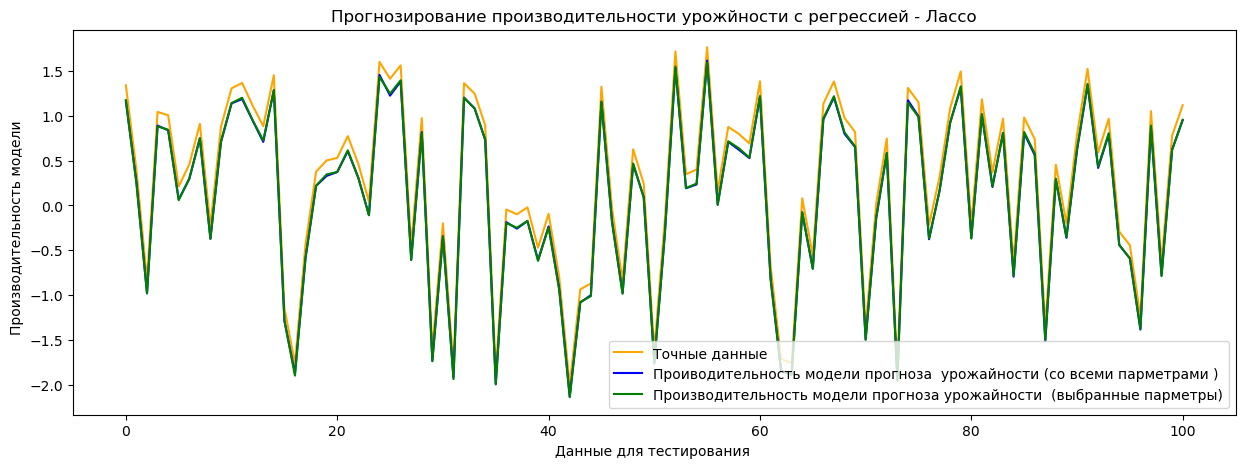

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.plot(y_test, color='orange',label='Точные данные ')
plt.plot(pred_all, color='blue',label='Проиводительность модели прогноза  урожайности (со всеми парметрами )')
plt.plot(pred_sel, color='green',label='Производительность модели прогноза урожайности  (выбранные парметры)')
plt.title('Прогнозирование производительности урожйности с регрессией - Лассо')
plt.xlabel("Данные для тестирования ")
plt.ylabel('Производительность модели  ')
plt.legend()
plt.show()

Производительность Лассо регрессии , мы видим , что отрицательные значения.Это означает, что модель дает неточные результаты.  